## Visualizations

We create the visualizations in the report using this jupyter notebook.

In [3]:
# Import necessary libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
sns.set_theme()

## The Effect of Increasing Number of Reference Points 

In this section, we visualize the execution time of KNNSearch with increasing number of reference points. The other parameters are fixed:
- Embedding Dimension: $25$
- Value of k: $5$
- Number of Query Points: $200$

In [40]:
# Please refer to the data in result/scalingRef/scalingRef.out and scalingRefCPU.out
scalingRefGPU = dict({"Label": ["GPU"] * 15, "RefNum": list(range(5, 20)), "Time": [0.06728, 
                                                   0.10903, 
                                                   0.177254, 
                                                   0.264624, 
                                                   0.408266, 
                                                   0.594182, 
                                                   0.902413,
                                                   1.94579,
                                                   3.40823,
                                                   6.28556,
                                                   11.3092,
                                                   21.444,
                                                   41.6747,
                                                   82.7587,
                                                   164.559]})
scalingRefCPU = dict({"Label": ["CPU"] * 15, "RefNum": list(range(5, 20)), "Time": [0.210347, 
                                                   0.38835, 
                                                   0.730896, 
                                                   1.42316, 
                                                   2.82494, 
                                                   6.25389, 
                                                   12.8796,
                                                   29.3549,
                                                   60.5257,
                                                   123.061,
                                                   278.719,
                                                   1000.76,
                                                   4185.79,
                                                   7696.37,
                                                   15887.5]})
df1 = pd.DataFrame(data=scalingRefGPU)
df2 = pd.DataFrame(data=scalingRefCPU)
df = pd.concat([df1, df2])
print(df.head())

  Label  RefNum      Time
0   GPU       5  0.067280
1   GPU       6  0.109030
2   GPU       7  0.177254
3   GPU       8  0.264624
4   GPU       9  0.408266


In [41]:
df.Time = np.log(df.Time)

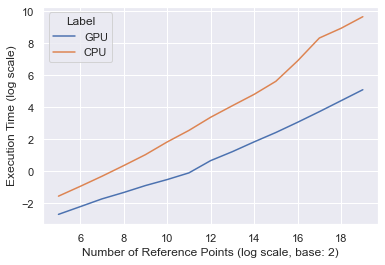

In [44]:
ax = sns.lineplot(data=df, x="RefNum", y="Time", hue="Label")
_ = ax.set(xlabel="Number of Reference Points (log scale, base: 2)", ylabel="Execution Time (log scale)")
plt.savefig("refScaling.png", dpi=600)

## The Effect of Increasing Number of Query Points 

In this section, we visualize the execution time of KNNSearch with increasing number of query points. The other parameters are fixed:
- Embedding Dimension: $25$
- Value of k: $5$
- Number of Reference Points: $16384$

In [45]:
# Please refer to the data in result/scalingRef/scalingRef.out and scalingRefCPU.out
scalingQGPU = dict({"Label": ["GPU"] * 10, "QueryNum": list(range(4, 14)), "Time": [4.98539, 
                                                                                    5.38117,
                                                                                    5.90317,
                                                                                    6.05643,
                                                                                    6.24359,
                                                                                    6.68009,
                                                                                    6.99059,
                                                                                    8.6424,
                                                                                    11.9436,
                                                                                    18.7251]})
scalingQCPU = dict({"Label": ["CPU"] * 10, "QueryNum": list(range(4, 14)), "Time": [12.0587, 
                                                   19.975, 
                                                   39.6198, 
                                                   78.6367, 
                                                   157.203, 
                                                   375.466, 
                                                   903.471,
                                                   1808.22,
                                                   3628.7,
                                                   7288.07]})
df1 = pd.DataFrame(data=scalingQGPU)
df2 = pd.DataFrame(data=scalingQCPU)
df = pd.concat([df1, df2])
print(df.head())

  Label  QueryNum     Time
0   GPU         4  4.98539
1   GPU         5  5.38117
2   GPU         6  5.90317
3   GPU         7  6.05643
4   GPU         8  6.24359


In [46]:
df.Time = np.log(df.Time)

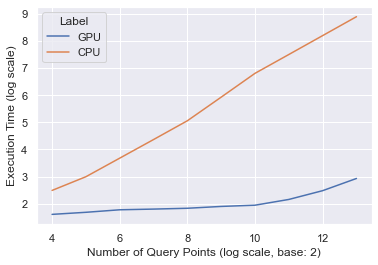

In [47]:
ax = sns.lineplot(data=df, x="QueryNum", y="Time", hue="Label")
_ = ax.set(xlabel="Number of Query Points (log scale, base: 2)", ylabel="Execution Time (log scale)")
plt.savefig("scalingQuery.png", dpi=600)

## The Effect of Increasing k

In this section, we visualize the execution time of KNNSearch with increasing k. The other parameters are fixed:
- Embedding Dimension: $25$
- Number of Reference Points: $16384$
- Number of Query Points: $1024$

In [48]:
# Please refer to the data in result/scalingRef/scalingRef.out and scalingRefCPU.out
scalingK= dict({"Label": ["GPU"] * 7, "k": [5, 10, 20, 40, 80, 160, 320], "Time": [7.70548, 
                                                                                    8.96806,
                                                                                    14.4952,
                                                                                    31.2331,
                                                                                    85.5097,
                                                                                    250.217,
                                                                                    1160.13]})
scalingKCPU = dict({"Label": ["CPU"] * 7, "k": [5, 10, 20, 40, 80, 160, 320], "Time": [897.498, 
                                                   901.378, 
                                                   905.068, 
                                                   913.911, 
                                                   925.552, 
                                                   969.681, 
                                                   1118.44]})
df1 = pd.DataFrame(data=scalingK)
df2 = pd.DataFrame(data=scalingKCPU)
df = pd.concat([df1, df2])
print(df.head())

  Label   k      Time
0   GPU   5   7.70548
1   GPU  10   8.96806
2   GPU  20  14.49520
3   GPU  40  31.23310
4   GPU  80  85.50970


In [49]:
df.Time = np.log(df.Time)

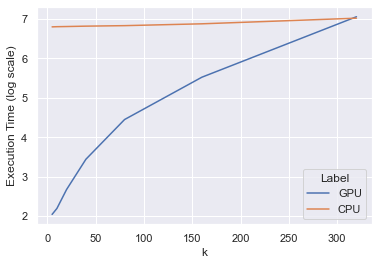

In [50]:
ax = sns.lineplot(data=df, x="k", y="Time", hue="Label")
_ = ax.set(xlabel="k", ylabel="Execution Time (log scale)")
plt.savefig("scalingK.png", dpi=600)

## The Effect of Increasing Embedding Dimension

In this section, we visualize the execution time of KNNSearch with increasing embedding dimension. The other parameters are fixed:
- Value of k: $50$
- Number of Reference Points: $16384$
- Number of Query Points: $1024$

In [51]:
# Please refer to the data in result/scalingRef/scalingRef.out and scalingRefCPU.out
scalingDimCPU= dict({"Label": ["CPU"] * 5, "Dimension": [25, 50, 100, 200, 400], "Time": [914.701, 
                                                                                    1874.16,
                                                                                    14681.7,
                                                                                    29620.3,
                                                                                    74895.7,]})
scalingDim = dict({"Label": ["GPU"] * 6, "Dimension": [25, 50, 100, 200, 400, 800], "Time": [44.6564, 
                                                   43.078, 
                                                   44.9341, 
                                                   49.4782, 
                                                   56.918, 
                                                   79.5457]})
df1 = pd.DataFrame(data=scalingDim)
df2 = pd.DataFrame(data=scalingDimCPU)
df = pd.concat([df1, df2])
print(df.head())

  Label  Dimension     Time
0   GPU         25  44.6564
1   GPU         50  43.0780
2   GPU        100  44.9341
3   GPU        200  49.4782
4   GPU        400  56.9180


In [52]:
df.Time = np.log(df.Time)

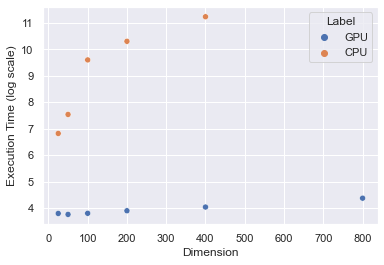

In [53]:
ax = sns.scatterplot(data=df, x="Dimension", y="Time", hue="Label")
_ = ax.set(xlabel="Dimension", ylabel="Execution Time (log scale)")
plt.savefig("scalingD.png", dpi=600)

In [ ]:
plt.xticks(np.arange(25, , 5))